# Lab 2: Classification

### Data Preparation

In [15]:
# Import basic packages lik numpy, pandas, math plot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/lijjumathew/MSDS-Machine-Learning-1-Project/master/dataset/Telco-Customer-Churn.csv')

In [3]:
#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns
df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')

# Getting rid of unwanted columns like Customer Id.
if 'customerID' in df:
    del df['customerID']
    
# converting TotalCharges object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

# Replacing blank values with nulls.
df=df.replace(r'^\s*$', np.nan, regex=True)

# Total charges has some blank values/missing values and needs to be imputed. Filling the missing values
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

# Consolidate MultipleLines attribute
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

# Change all values of 'No internet service' to 'No'
df = df.replace('No internet service','No')

# Replace all yes/no values with 1/0
df = df.replace(to_replace=['Yes','No'], value=[1,0])

# Create dummy variables in the entire dataset
df = pd.get_dummies(df)

### Data Split

In [4]:
# Separate the churn results from the dataset
y = df['MonthlyCharges'].values
x = df.drop(columns = ['MonthlyCharges'])

# Set features
features = x.columns.values

# Normalize values
scale = MinMaxScaler(feature_range = (0,1))
scale.fit(x)
x = pd.DataFrame(scale.transform(x))
x.columns = features

# Set up train/test split with 80/20 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 99)

### Modeling and Evaluation

#### Multiple Linear Regression - Monthly Charges

#### Feature Selection

In [7]:
def features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=f_regression)
    fs.fit(x_train,y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

<function matplotlib.pyplot.show(*args, **kw)>

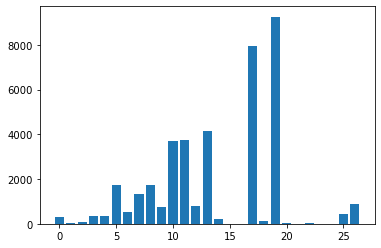

In [8]:
x_train_fs, x_test_fs, fs = features(x_train, y_train, x_test)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show

In [10]:
std = StandardScaler()
std.fit(x.values)
x_scaled = std.transform(x.values)
alphavec = 10**np.linspace(-3,3,200)   
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(x_scaled, y)
print('LASSO best alpha: ', lasso_model.alpha_ )
list(zip(x.columns, lasso_model.coef_))


LASSO best alpha:  0.007488103857590023


[('SeniorCitizen', 0.0),
 ('Partner', -0.01048733225222931),
 ('Dependents', 0.0),
 ('tenure', -0.04708633256700617),
 ('PhoneService', 5.916531280250363),
 ('MultipleLines', 2.462403105429277),
 ('OnlineSecurity', 2.248002111817122),
 ('OnlineBackup', 2.352837117517344),
 ('DeviceProtection', 2.3692055711830053),
 ('TechSupport', 2.265954895176112),
 ('StreamingTV', 4.8346463899181105),
 ('StreamingMovies', 4.839358731533135),
 ('PaperlessBilling', -0.0),
 ('TotalCharges', 0.11477114074564651),
 ('Churn', -0.0),
 ('gender_Female', -0.003031715518489827),
 ('gender_Male', 1.311522868789053e-17),
 ('InternetService_0', -14.446861951452755),
 ('InternetService_DSL', -4.751745984287944),
 ('InternetService_Fiber optic', 7.394081865029139),
 ('Contract_Month-to-month', 0.0),
 ('Contract_One year', 0.0),
 ('Contract_Two year', -0.0021764854561720256),
 ('PaymentMethod_Bank transfer (automatic)', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0),
 ('PaymentMethod_Electronic check', -0.0)